In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import torch

import pyro.distributions as dist

#### Code 3.1

In [2]:
PrPV = 0.95
PrPM = 0.01
PrV = 0.001
PrP = PrPV * PrV + PrPM * (1 - PrV)
PrVP = PrPV * PrV / PrP
PrVP

0.08683729433272395

#### Code 3.2

In [3]:
p_grid = torch.linspace(start=0, end=1, steps=1000)
prior = torch.tensor(1.).repeat(1000)
likelihood = dist.Binomial(total_count=9, probs=p_grid).log_prob(torch.tensor(6.)).exp()
posterior = likelihood * prior
posterior = posterior / sum(posterior)

#### Code 3.3

In [4]:
samples = p_grid[torch.multinomial(input=posterior, num_samples=int(1e4),
                                   replacement=True)]

#### Code 3.4

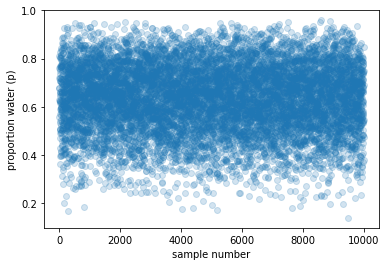

In [5]:
plt.plot(samples.numpy(), "o", alpha=0.2)
plt.xlabel("sample number")
plt.ylabel("proportion water (p)");

#### Code 3.5

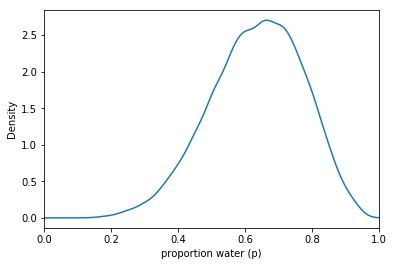

In [6]:
pd.Series(samples).plot(kind="density", xlim=(0, 1))
plt.xlabel("proportion water (p)");

#### Code 3.6

In [7]:
# add up posterior probability where p < 0.5
sum(posterior[p_grid < 0.5])

tensor(0.1719)

#### Code 3.7

In [8]:
sum((samples < 0.5).float()) / 1e4

tensor(0.1700)

#### Code 3.8

In [9]:
sum(((samples > 0.5) & (samples < 0.75)).float()) / 1e4

tensor(0.6140)

#### Code 3.9

In [10]:
pd.Series(samples).quantile(0.8)

0.7577577233314514

#### Code 3.10

In [11]:
pd.Series(samples).quantile([0.1, 0.9])

0.1    0.448448
0.9    0.807808
dtype: float64

#### Code 3.11

In [12]:
p_grid = torch.linspace(start=0, end=1, steps=1000)
prior = torch.tensor(1.).repeat(1000)
likelihood = dist.Binomial(total_count=3, probs=p_grid).log_prob(torch.tensor(3.)).exp()
posterior = likelihood * prior
posterior = posterior / sum(posterior)
samples = p_grid[torch.multinomial(input=posterior, num_samples=int(1e4),
                                   replacement=True)]

#### Code 3.12

In [13]:
prob = 0.5
pd.Series(samples).quantile([(1 - prob) / 2, (1 + prob) / 2])

0.25    0.703704
0.75    0.930931
dtype: float64

#### Code 3.13

In [14]:
def HPDI(samples, prob=0.5):
    sorted_samples = samples.sort()[0]
    mass = int(prob * len(samples))
    len_intervals = sorted_samples[mass:] - sorted_samples[:-mass]
    index = len_intervals.argmin()
    return sorted_samples[index], sorted_samples[index + mass]

HPDI(samples, prob=0.5)

(tensor(0.8378), tensor(1.))

#### Code 3.14

In [15]:
p_grid[posterior.argmax()]

tensor(1.)

#### Code 3.15

In [16]:
samples.mode()[0]

tensor(0.9419)

#### Code 3.16

In [17]:
samples.mean(), samples.median()

(tensor(0.7980), tensor(0.8378))

#### Code 3.17

In [18]:
sum(posterior * abs(0.5 - p_grid))

tensor(0.3129)

#### Code 3.18

In [19]:
loss = (posterior * abs(p_grid.unsqueeze(1) - p_grid)).sum(dim=1)

#### Code 3.19

In [20]:
p_grid[loss.argmin()]

tensor(0.8408)

#### Code 3.20

In [21]:
dist.Binomial(total_count=2, probs=0.7).log_prob(
    torch.tensor(range(3), dtype=torch.float)).exp()

tensor([0.0900, 0.4200, 0.4900])

#### Code 3.21

In [22]:
dist.Binomial(total_count=2, probs=0.7).sample()

tensor(2.)

#### Code 3.22

In [23]:
dist.Binomial(total_count=2, probs=0.7).sample(torch.Size([10]))

tensor([2., 1., 2., 2., 1., 1., 1., 1., 2., 2.])

#### Code 3.23

In [24]:
dummy_w = dist.Binomial(total_count=2, probs=0.7).sample(torch.Size([int(1e5)]))
dummy_w.long().bincount().float() / 1e5

tensor([0.0896, 0.4198, 0.4906])

#### Code 3.24

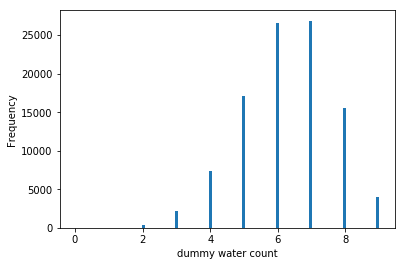

In [25]:
dummy_w = dist.Binomial(total_count=9, probs=0.7).sample(torch.Size([int(1e5)]))
plt.hist(dummy_w.numpy(), bins=100)
plt.xlabel("dummy water count")
plt.ylabel("Frequency");

#### Code 3.25

In [26]:
w = dist.Binomial(total_count=9, probs=0.7).sample(torch.Size([int(1e4)]))

#### Code 3.26

In [27]:
w = dist.Binomial(total_count=9, probs=samples).sample()

#### Code 3.27

In [28]:
p_grid = torch.linspace(start=0, end=1, steps=1000)
prior = torch.tensor(1.).repeat(1000)
likelihood = dist.Binomial(total_count=3, probs=p_grid).log_prob(torch.tensor(3.)).exp()
posterior = likelihood * prior
posterior = posterior / sum(posterior)
torch.manual_seed(100)
samples = p_grid[torch.multinomial(input=posterior, num_samples=int(1e4),
                                   replacement=True)]

#### Code 3.28

In [29]:
birth1 = torch.tensor([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
                       0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
                       1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
                       1,0,1,1,1,0,1,1,1,1])
birth2 = torch.tensor([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
                       1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
                       1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
                       0,0,0,1,1,1,0,0,0,0])

#### Code 3.29

In [30]:
homeworkch3 = torch.load("data/homeworkch3.pt")

#### Code 3.30

In [31]:
sum(birth1) + sum(birth2)

tensor(111)